In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
import matplotlib.pyplot as plt

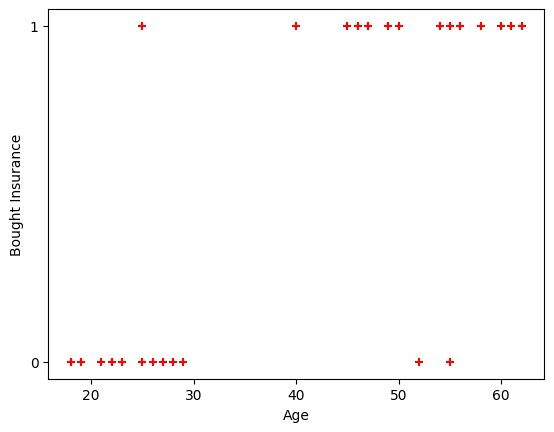

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.yticks(range(0,2))
plt.show()

In [5]:
x = df.drop('bought_insurance',axis=1)
y = df.bought_insurance

In [6]:
x

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [7]:
y

,bought_insurance
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [10]:
model = LogisticRegression()

In [11]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [12]:
model.score(xtest,ytest)

1.0

In [13]:
model.score(xtrain,ytrain)

0.8571428571428571

In [14]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


####  Remove outliers to improve accurcy

In [15]:
df.drop(index= [3,6,16],inplace=True)

In [16]:
x = df.drop('bought_insurance',axis=1)
y = df.bought_insurance

In [17]:
x

,age
0,22
1,25
2,47
4,46
5,56
7,60
8,62
9,61
10,18
11,28


In [18]:
y

,bought_insurance
0,0
1,0
2,1
4,1
5,1
7,1
8,1
9,1
10,0
11,0


In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [22]:
model.score(xtest,ytest)

1.0

In [23]:
model.score(xtrain,ytrain)

1.0

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
model.predict([[20]])

array([0])

In [26]:
model.predict([[44]])

array([1])

In [27]:
probabilities = model.predict_proba([[27]])
probabilities

array([[0.99082349, 0.00917651]])

In [29]:
  import numpy as np

In [32]:
np.argmax(probabilities)

0

In [33]:
probabilities = model.predict_proba([[44]])
probabilities

array([[0.00408567, 0.99591433]])

In [34]:
np.argmax(probabilities)

1

##### model.coef_ indicates value of m in y=m*x + b equation

In [35]:
model.coef_


array([[0.59870967]])

##### model.intercept_ indicates value of b in y=m*x + b equation

In [36]:
model.intercept_

array([-20.84705087])

#### Lets defined sigmoid function now and do the math with hand

In [58]:
import math
def sigmoid(y):
  return 1 / (1 + math.exp(-y))


In [62]:
def prediction_fun(age):
  y = model.coef_ * age + model.intercept_
  print(y)
  return sigmoid(y)


In [63]:
age = 40
prediction_fun(age)

[[20.29009563]]


0.9999999984578614

In [64]:
age = 40
prediction_fun(age)

[[20.29009563]]


0.9999999984578614